# Principal Component Analysis

Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.


In [1]:
import pandas as pd

df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [3]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [4]:
df.shape

(178, 14)

In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df_col = df.columns.to_list()
df_col

['Type',
 'Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color',
 'Hue',
 'Dilution',
 'Proline']

### Visializations

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

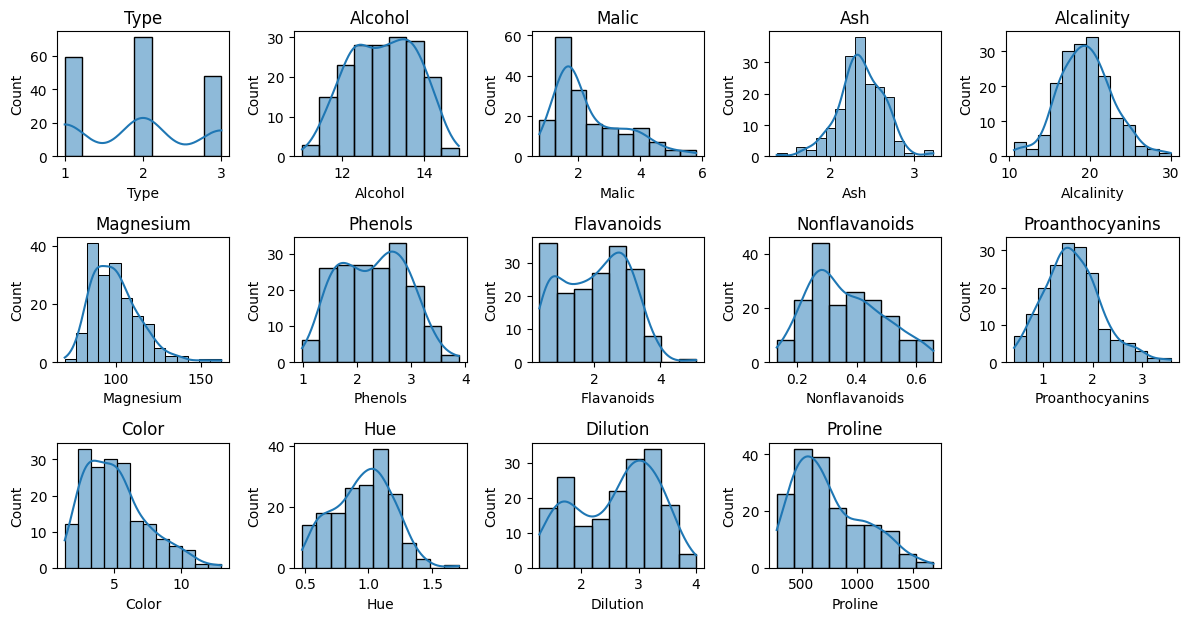

In [8]:
# Histogram
plt.figure(figsize=(12,10))
for i,col in enumerate(df_col):
    plt.subplot(5,5,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

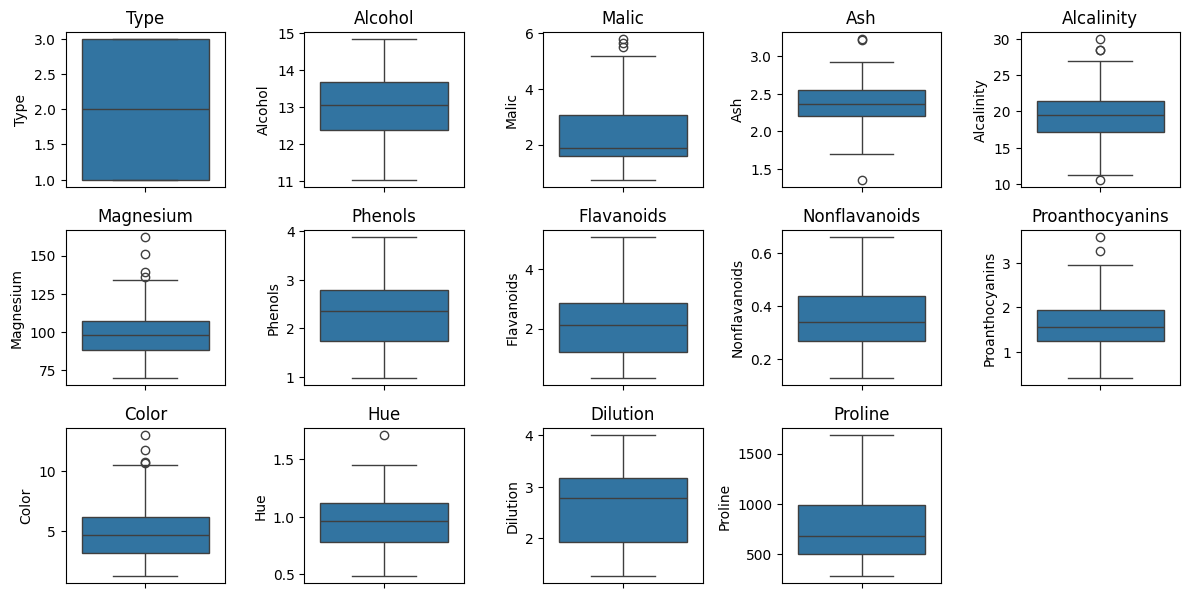

In [9]:
# Box Plot

plt.figure(figsize=(12,10))
for i,col in enumerate(df_col):
    plt.subplot(5,5,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

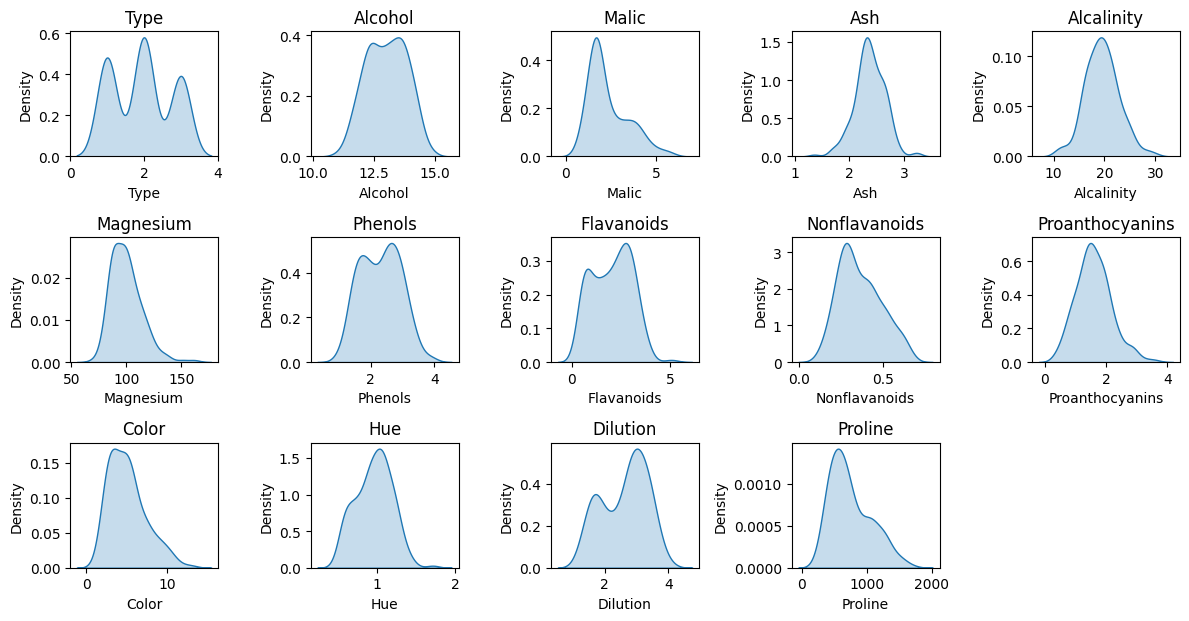

In [10]:
# Density Plot

plt.figure(figsize=(12,10))
for i,col in enumerate(df_col):
    plt.subplot(5,5,i+1)
    sns.kdeplot(df[col],fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


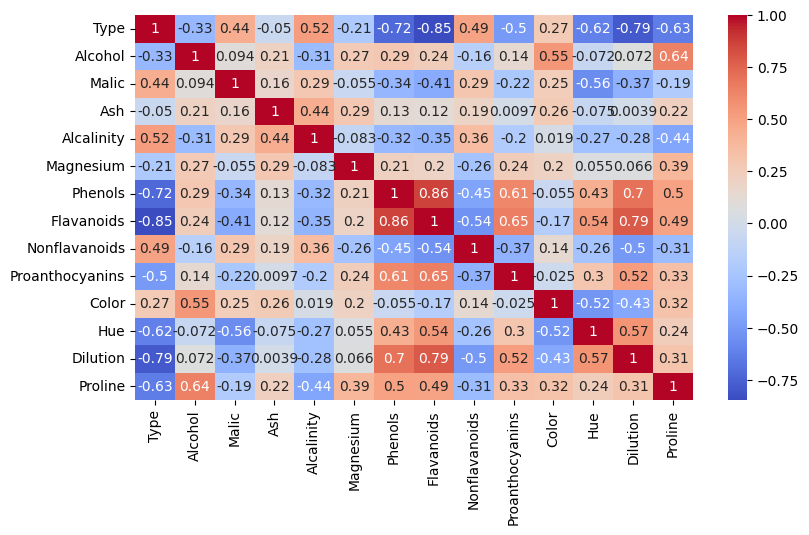

In [12]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

## Task 2: Dimensionality Reduction with PCA:

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [13]:
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df_col)
df_scaled

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [14]:
df_scaled.shape

(178, 14)

### PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=14)
transform_data = pca.fit_transform(df_scaled)

transform_data

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [17]:
# Weights
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [ 0.00569041,  0.48416087,  0.22359095,  0.31585588, -0.01161574,
         0.30055143,  0.06711983, -0.00131345,  0.0269887 ,  0.04122256,
         0.52978274, -0.27790735, -0.16277625,  0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [18]:
#  Explained Variance Ratio
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [19]:
import numpy 
var1 = numpy.round(numpy.cumsum(var*100),decimals=2)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.6 ,  85.41,  89.36,  91.87,
        93.97,  95.84,  97.46,  98.66,  99.59, 100.  ])

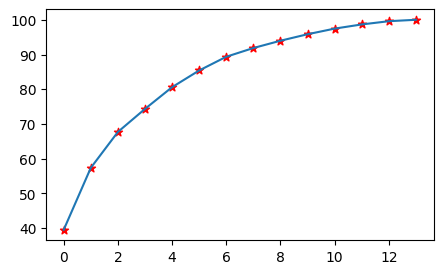

In [20]:
plt.figure(figsize=(5,3))
plt.plot(var1)
plt.scatter(range(14),var1,color='red',marker='*')

In [21]:
transform_data[:,0:8]

array([[-3.5229339 ,  1.45309844, -0.16479549, ...,  0.30071618,
         0.57387557, -0.05563728],
       [-2.52885806, -0.33001925, -2.02670665, ...,  0.88430941,
        -0.02971648, -1.01037189],
       [-2.78502898,  1.03693595,  0.9832377 , ..., -0.46884161,
         0.4883054 ,  0.26895705],
       ...,
       [ 3.02727243,  2.75604024, -0.94080304, ..., -0.00529036,
         0.73302611, -0.05254455],
       [ 2.75522166,  2.29378408, -0.55047368, ..., -1.01256231,
         0.75542325, -0.42651198],
       [ 3.49633565,  2.76060799,  1.01315115, ..., -0.37722337,
         0.01530664,  0.32500213]])

In [22]:
transformed_DF = pd.DataFrame(transform_data[:,0:8],columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
transformed_DF

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937
...,...,...,...,...,...,...,...,...
173,3.627996,2.206617,-0.343668,0.751705,-1.004109,1.143155,0.843455,0.206626
174,2.942729,1.752263,0.207480,0.399381,0.154223,0.062465,0.139947,0.565588
175,3.027272,2.756040,-0.940803,0.607758,1.128136,-0.005290,0.733026,-0.052545
176,2.755222,2.293784,-0.550474,-0.391570,1.067083,-1.012562,0.755423,-0.426512


In [23]:
df_pca_col = transformed_DF.columns.to_list()
df_pca_col

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

# Task 3: Clustering with Original Data:

1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.

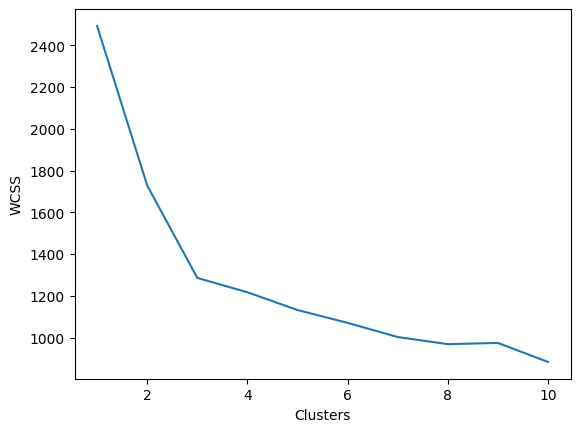

In [24]:
from sklearn.cluster import  KMeans

wcss =[]
for i in range(1,11):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
original_clusters = kmeans.labels_
original_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

2.	Visualize the clustering results using appropriate plots.

<Axes: xlabel='Magnesium', ylabel='Alcohol'>

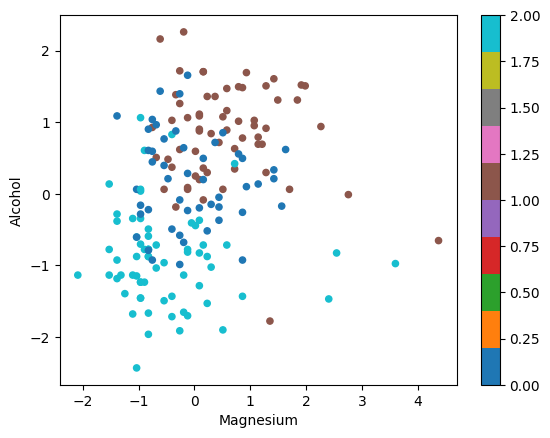

In [43]:
df_scaled.plot(x='Magnesium',y='Alcohol',c=original_clusters,cmap='tab10',kind='scatter')

3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [44]:
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled,original_clusters)

0.30648398324833453

# Task 4: Clustering with PCA Data:

1.	Apply the same clustering algorithm to the PCA-transformed dataset.

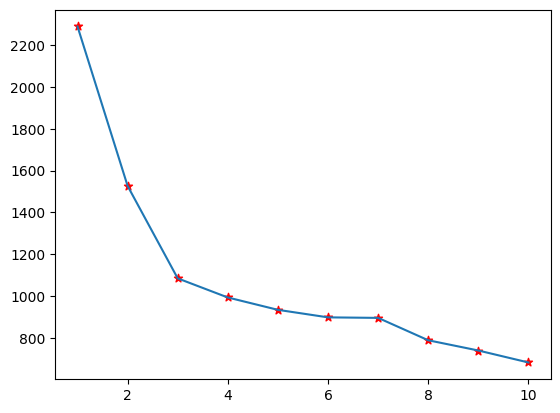

In [45]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(transformed_DF)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,marker='*',color='red')

In [46]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(transformed_DF)
transformed_clusters = kmeans.labels_
transformed_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

2.	Visualize the clustering results obtained from PCA-transformed data.

<Axes: xlabel='PC1', ylabel='PC2'>

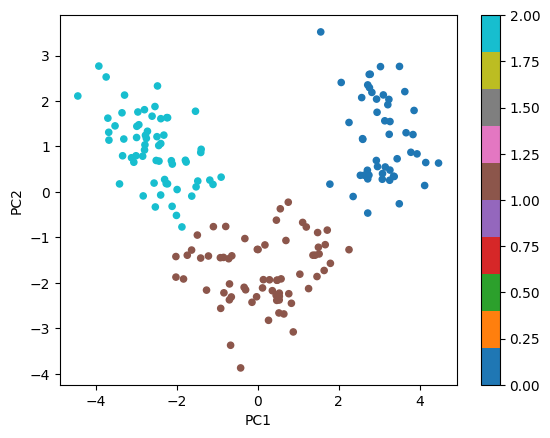

In [47]:
transformed_DF.plot(x='PC1',y='PC2',kind='scatter',c=transformed_clusters,colormap='tab10')

3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

In [48]:
silhouette_score(transformed_DF,transformed_clusters)

0.34024286668577897

In [59]:
df1 = pd.concat([pd.Series(original_clusters,name='original_clusters'),
                 pd.Series(transformed_clusters,name='PCA_Clusters')],axis=1)

data = pd.concat([df,df1],axis=1)

In [61]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,original_clusters,PCA_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0


# Task 5: Comparison and Analysis:

### 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
The PCA-based clustering produced more compact and well-separated groups compared to the original dataset. The silhouette score slightly increased after PCA, showing better-defined clusters. However, the original data retained more interpretability since it used real feature values.

### 2.	Discuss any similarities or differences observed in the clustering results.
. Similarities and Differences

Both approaches form roughly similar clusters in terms of count (e.g., 3 clusters).

However, PCA clusters show better separation and less overlap — visual plots look cleaner.

The cluster centroids may shift slightly because PCA changes feature space orientation.

In PCA data, noise and correlated variables are minimized, resulting in smoother cluster boundaries.

### 3.	Reflect on the impact of dimensionality reduction on clustering performance.
Impact of Dimensionality Reduction on Clustering

PCA removes redundant correlations among features, reducing the influence of noisy dimensions.

This helps K-Means focus on major variance directions, improving compactness and silhouette score.

However, PCA also transforms features into principal components, making clusters less interpretable in original feature terms.

### 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
Using PCA improves cluster separation and computational efficiency, especially for high-dimensional data. But it sacrifices interpretability — clusters become harder to explain because principal components don’t directly represent real-world features.

# Task 6: Conclusion and Insights

### 1.	Summarize the key findings and insights from the assignment.
The clustering techniques (K-Means, Hierarchical, DBSCAN) grouped the data effectively, revealing hidden patterns. Applying PCA before clustering improved separation and reduced noise, leading to clearer and more compact clusters.

### 2. Discuss the practical implications of using PCA and clustering in data analysis.
Using PCA simplifies high-dimensional data, enhances clustering performance, and speeds up computation. Clustering, in turn, helps in identifying similar patterns or behaviors in large datasets, supporting better decision-making in real-world applications.

### 3. Provide recommendations for when to use each technique based on the analysis conducted.
Use PCA before clustering when the dataset has many correlated features or high dimensionality.
Use clustering on original data when interpretability is important and features have clear meaning.
A combined approach—PCA for dimensionality reduction followed by clustering—often gives the best balance between performance and understanding.